In [1]:
import numpy as np
import scipy as sp
from scipy import linalg as LA
import matplotlib.pyplot as plt
import time as tm

In [8]:
#Define the problem domain (1-D) and constants
hL = 10 # units are m
hR = 3 #units are m/day
K = 10 #units are m/day
xmax = 1000 #units are m
dy = 1

#Define discretization
n = 20
dx = (xmax)/n
x = np.linspace((dx/2),(xmax-dx/2),n)

#Iterative solution thresholds
thresh = 0.001
maxiter = 25

#Setup initial guess
h_initguess = 10000000000*np.ones((n,))

#Analytical solution (known)
xa = np.linspace(0,xmax,100)
h1D_soln_analyt = np.sqrt(((hR**2 - hL**2)/xmax)*xa + hL**2)

h change =  9999999991.615385
h change =  4.914700473047244
h change =  0.7871541158757056
h change =  0.08118933572170128
h change =  0.026252734318926052
h change =  0.002848710851324654
h change =  0.0008376468547695026
Converged!


Text(0.5, 1.0, 'Final Result')

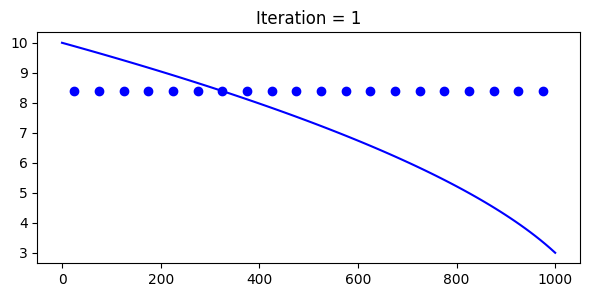

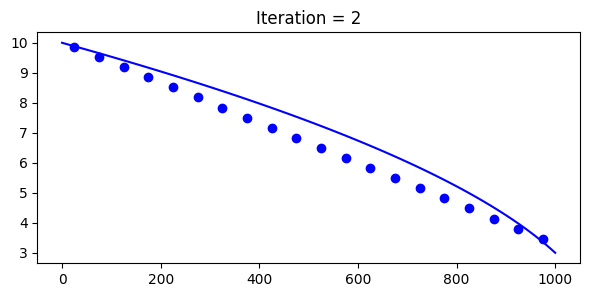

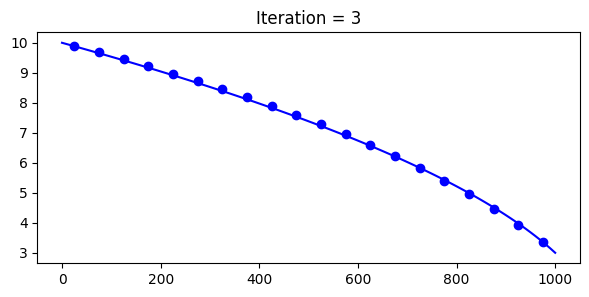

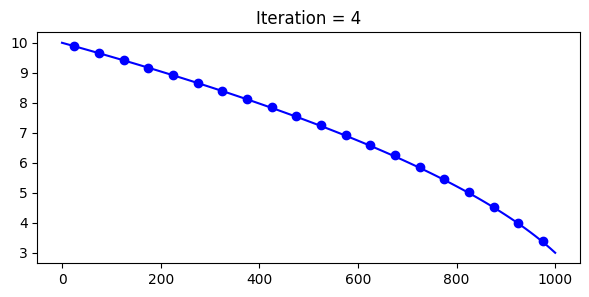

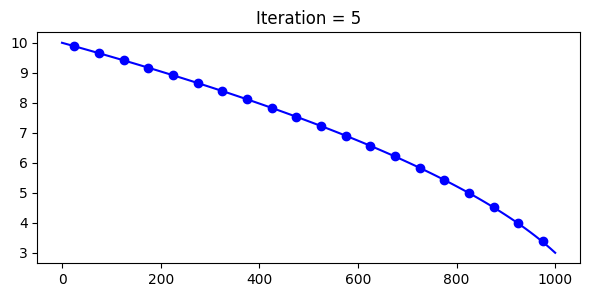

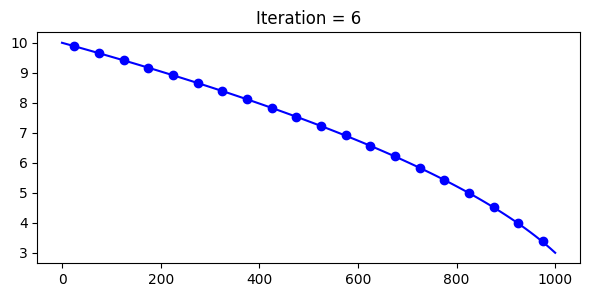

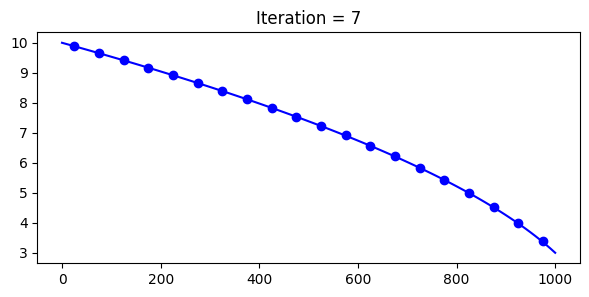

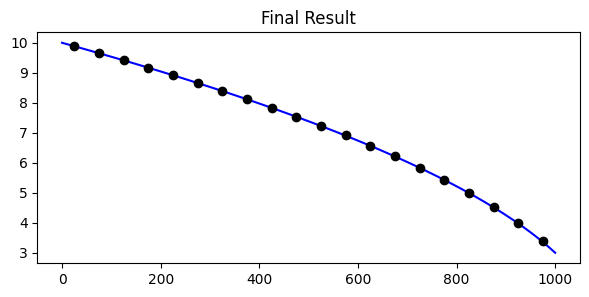

In [9]:
#Perform iterative linear solution
A = np.zeros((n,n))
b = np.zeros((n))

h_curr = h_initguess
iternum = 0
h_change = thresh + 1
while (h_change > thresh) & (iternum < maxiter):

    for i in range(n):
      if i == 0:
        A[i,i] = -2*K*hL*dy/dx -K*dy*(h_curr[0] + h_curr[1])/(2*dx)
        A[i,i+1] = K*dy*(h_curr[0] + h_curr[1])/(2*dx)
        b[i] = -2*K*hL**2*dy/dx
      elif i == (n-1):
        A[i,i] = -2*K*hR*dy/dx - K*dy*(h_curr[n-2]+h_curr[n-1])/(2*dx)
        A[i,i-1] = K*dy*(h_curr[n-2]+h_curr[n-1])/(2*dx)
        b[i] = -2*K*hR**2*dy/dx
      else:
        A[i,i-1] = K*dy*(h_curr[i-1]+h_curr[i])/(2*dx)
        A[i,i] = -K*dy*(h_curr[i-1]+h_curr[i])/(2*dx) - K*dy*(h_curr[i+1]+h_curr[i])/(2*dx)
        A[i,i+1] = K*dy*(h_curr[i+1]+h_curr[i])/(2*dx)
        b[i] = 0
        
    h = LA.solve(A,b)
    Ah = A@h
    resid = Ah - b

    h_change = np.max(np.abs(h - h_curr))
    print('h change = ', h_change)
    h_curr = h
    iternum += 1
    
    fig, axes = plt.subplots(1, 1, figsize=(7, 3))
    axes.plot(xa, h1D_soln_analyt, "b",label="Analytical Solution")
    axes.plot(x, h, "ob",label="Numerical Solution")
    axes.set_title(f'Iteration = {iternum}')

if iternum >= maxiter:
    print('Failed to converge!')
else:
    print('Converged!')

h_final = h

fig, axes = plt.subplots(1, 1, figsize=(7, 3))
axes.plot(xa, h1D_soln_analyt, "b",label="Analytical Solution")
axes.plot(x, h_final, "ok",label="Final Numerical Solution")
axes.set_title('Final Result')